# Clone Paddle Repo

In [1]:
!git clone https://github.com/PaddlePaddle/PaddleOCR

Cloning into 'PaddleOCR'...
remote: Enumerating objects: 19366, done.
remote: Counting objects: 100% (1044/1044), done.
remote: Compressing objects: 100% (416/416), done.
remote: Total 19366 (delta 664), reused 975 (delta 623), pack-reused 18322
Receiving objects: 100% (19366/19366), 122.29 MiB | 14.38 MiB/s, done.
Resolving deltas: 100% (12957/12957), done.


# If first time implement, run these block below


## Import test/train data from IC15:
* Data consists of 2 annotation files and 2 folders of test and train images. Each annotation and folder are for test and train.

* You can obtain img data from this link:
https://rrc.cvc.uab.es/?ch=4&com=downloads
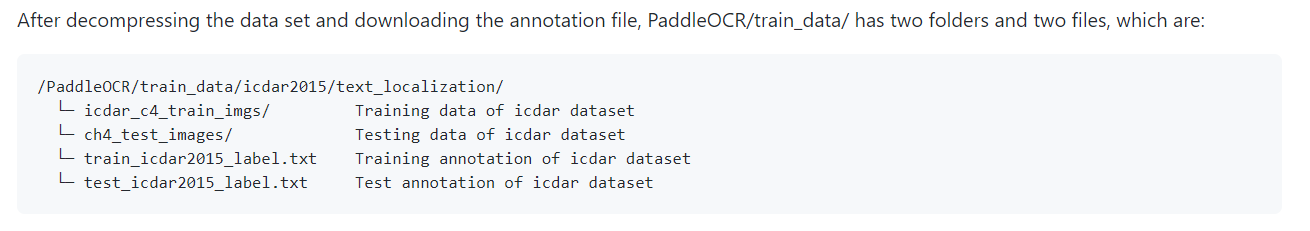

## Get pretrained_model: ResNet50 and MobileNetV3

In [ ]:
!cd PaddleOCR/
!wget -P ./train_data/ https://paddleocr.bj.bcebos.com/dataset/train_icdar2015_label.txt
!wget -P ./train_data/ https://paddleocr.bj.bcebos.com/dataset/test_icdar2015_label.txt
!wget -P ./pretrain_models/ https://paddle-imagenet-models-name.bj.bcebos.com/dygraph/ResNet50_vd_ssld_pretrained.pdparams
!wget -P ./pretrain_models/ https://paddle-imagenet-models-name.bj.bcebos.com/dygraph/MobileNetV3_large_x0_5_pretrained.pdparams

--2021-07-28 04:15:38--  https://paddle-imagenet-models-name.bj.bcebos.com/dygraph/ResNet50_vd_ssld_pretrained.pdparams
Resolving paddle-imagenet-models-name.bj.bcebos.com (paddle-imagenet-models-name.bj.bcebos.com)... 220.181.33.43, 220.181.33.44, 2409:8c04:1001:1002:0:ff:b001:368a, ...
Connecting to paddle-imagenet-models-name.bj.bcebos.com (paddle-imagenet-models-name.bj.bcebos.com)|220.181.33.43|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 154941049 (148M) [application/octet-stream]
Saving to: ‘./pretrain_models/ResNet50_vd_ssld_pretrained.pdparams’

ResNet50_vd_ssld_pr 100%[===================>] 147.76M   413KB/s    in 5m 44s  

2021-07-28 04:21:24 (440 KB/s) - ‘./pretrain_models/ResNet50_vd_ssld_pretrained.pdparams’ saved [154941049/154941049]

--2021-07-28 04:21:24--  https://paddle-imagenet-models-name.bj.bcebos.com/dygraph/MobileNetV3_large_x0_5_pretrained.pdparams
Resolving paddle-imagenet-models-name.bj.bcebos.com (paddle-imagenet-models-name.bj.

Instal requirements for PaddleOCR

In [ ]:
!cd PaddleOCR/
!pip install -r /content/PaddleOCR/requirements.txt

     |████████████████████████████████| 12.5 MB 16 kB/s 
     |████████████████████████████████| 948 kB 54.9 MB/s 
     |████████████████████████████████| 123 kB 73.6 MB/s 
     |████████████████████████████████| 2.7 MB 59.2 MB/s 
     |████████████████████████████████| 50 kB 7.2 MB/s 
     |████████████████████████████████| 34.2 MB 16 kB/s 
     |████████████████████████████████| 190 kB 63.7 MB/s 
     |████████████████████████████████| 197 kB 58.7 MB/s 
     |████████████████████████████████| 73 kB 1.9 MB/s 
     |████████████████████████████████| 2.0 MB 52.8 MB/s 
     |████████████████████████████████| 68 kB 7.0 MB/s 
     |████████████████████████████████| 41 kB 685 kB/s 
     |████████████████████████████████| 1.9 MB 56.5 MB/s 
     |████████████████████████████████| 98 kB 8.0 MB/s 
     |████████████████████████████████| 5.3 MB 48.7 MB/s 
     |████████████████████████████████| 636 kB 49.8 MB/s 
     |████████████████████████████████| 338 kB 55.8 MB/s 
  Created wheel for python

In [ ]:
!pip install paddlepaddle

     |████████████████████████████████| 108.9 MB 42 kB/s 


In [ ]:
!pip install "paddleocr>=2.0.6"

     |████████████████████████████████| 189 kB 6.7 MB/s 
     |████████████████████████████████| 28.2 MB 55 kB/s 
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.4.0 which is incompatible.


In [ ]:
!pip install paddlepaddle-gpu

     |████████████████████████████████| 361.4 MB 22 kB/s 


In [ ]:
!mv '/content/pretrain_models' '/content/PaddleOCR'
%cd '/content/PaddleOCR'
!mkdir 'train_data'

/content/PaddleOCR


You should put your data into /train_data

## NOTE:
> You will have to code your own annotation format for model. The format is:
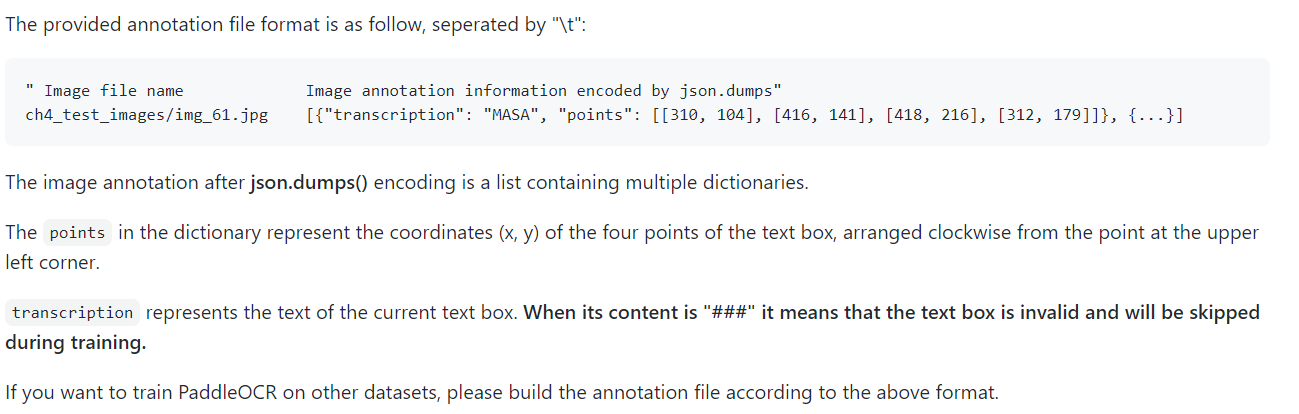

# Config model
> Open /content/PaddleOCR/configs/det/det_mv3_east.yml to adjust parameters for EAST model

> If you want to continue training, add your model path to 'checkpoints'

> In the config file, data_dir in Train global is your /train_data

> label_file_list is your train_annotation file.

> Same goes for Test global in the config file.

# Train data with EAST algorithms, using pretrained_model MobileNetV3 (or ResNet50)

In [ ]:
 !python /content/PaddleOCR/tools/train.py -c /content/PaddleOCR/configs/det/det_mv3_east.yml

[2021/07/28 05:42:39] root INFO: Architecture : 
[2021/07/28 05:42:39] root INFO:     Backbone : 
[2021/07/28 05:42:39] root INFO:         model_name : large
[2021/07/28 05:42:39] root INFO:         name : MobileNetV3
[2021/07/28 05:42:39] root INFO:         scale : 0.5
[2021/07/28 05:42:39] root INFO:     Head : 
[2021/07/28 05:42:39] root INFO:         model_name : small
[2021/07/28 05:42:39] root INFO:         name : EASTHead
[2021/07/28 05:42:39] root INFO:     Neck : 
[2021/07/28 05:42:39] root INFO:         model_name : small
[2021/07/28 05:42:39] root INFO:         name : EASTFPN
[2021/07/28 05:42:39] root INFO:     Transform : None
[2021/07/28 05:42:39] root INFO:     algorithm : EAST
[2021/07/28 05:42:39] root INFO:     model_type : det
[2021/07/28 05:42:39] root INFO: Eval : 
[2021/07/28 05:42:39] root INFO:     dataset : 
[2021/07/28 05:42:39] root INFO:         data_dir : /content/PaddleOCR/train_data
[2021/07/28 05:42:39] root INFO:         label_file_list : ['/content/Pad

# Evaluate model MobileNetV3 with 100 epoch


In [ ]:
 !python /content/PaddleOCR/tools/eval.py -c /content/PaddleOCR/configs/det/det_mv3_east.yml -o Global.checkpoints="/content/output/east_mv3/latest"

[2021/07/28 07:59:14] root INFO: Architecture : 
[2021/07/28 07:59:14] root INFO:     Backbone : 
[2021/07/28 07:59:14] root INFO:         model_name : large
[2021/07/28 07:59:14] root INFO:         name : MobileNetV3
[2021/07/28 07:59:14] root INFO:         scale : 0.5
[2021/07/28 07:59:14] root INFO:     Head : 
[2021/07/28 07:59:14] root INFO:         model_name : small
[2021/07/28 07:59:14] root INFO:         name : EASTHead
[2021/07/28 07:59:14] root INFO:     Neck : 
[2021/07/28 07:59:14] root INFO:         model_name : small
[2021/07/28 07:59:14] root INFO:         name : EASTFPN
[2021/07/28 07:59:14] root INFO:     Transform : None
[2021/07/28 07:59:14] root INFO:     algorithm : EAST
[2021/07/28 07:59:14] root INFO:     model_type : det
[2021/07/28 07:59:14] root INFO: Eval : 
[2021/07/28 07:59:14] root INFO:     dataset : 
[2021/07/28 07:59:14] root INFO:         data_dir : /content/PaddleOCR/train_data
[2021/07/28 07:59:14] root INFO:         label_file_list : ['/content/Pad

# Test predicting with a new image:

> The result image is located under /content/output/det_east/det_results

> The result annotation file is located under /content/output/det_east/predicts_east.txt

> Remember to convert result annotation file to suitable submission format.

> Predict on a folder: 
```
 !python /content/PaddleOCR/tools/infer_det.py -c /content/PaddleOCR/configs/det/det_mv3_east.yml -o Global.infer_img="/content/public_test" Global.pretrained_model="/content/output/east_mv3/latest"
 ```

In [ ]:
 !python /content/PaddleOCR/tools/infer_det.py -c /content/PaddleOCR/configs/det/det_mv3_east.yml -o Global.infer_img="/content/public_test" Global.pretrained_model="/content/output/east_mv3/latest"

[2021/07/28 09:04:20] root INFO: Architecture : 
[2021/07/28 09:04:20] root INFO:     Backbone : 
[2021/07/28 09:04:20] root INFO:         model_name : large
[2021/07/28 09:04:20] root INFO:         name : MobileNetV3
[2021/07/28 09:04:20] root INFO:         scale : 0.5
[2021/07/28 09:04:20] root INFO:     Head : 
[2021/07/28 09:04:20] root INFO:         model_name : small
[2021/07/28 09:04:20] root INFO:         name : EASTHead
[2021/07/28 09:04:20] root INFO:     Neck : 
[2021/07/28 09:04:20] root INFO:         model_name : small
[2021/07/28 09:04:20] root INFO:         name : EASTFPN
[2021/07/28 09:04:20] root INFO:     Transform : None
[2021/07/28 09:04:20] root INFO:     algorithm : EAST
[2021/07/28 09:04:20] root INFO:     model_type : det
[2021/07/28 09:04:20] root INFO: Eval : 
[2021/07/28 09:04:20] root INFO:     dataset : 
[2021/07/28 09:04:20] root INFO:         data_dir : /content/PaddleOCR/train_data
[2021/07/28 09:04:20] root INFO:         label_file_list : ['/content/Pad

In [ ]:
import math, requests

def submit_prediction(df, sep=',', comment='', compression='gzip', **kwargs):
    TOKEN='6a9753e1551cbdcefe0ca601843b4ccc3aeefec4f0e5d7ee456a64031198b5439930be564238bb0debc8376f6553e33d9c6c11dca10531ca80edc9211ef00f5c'
    URL='http://submission.mmlab.uit.edu.vn/api/submissions'
    df.to_csv('temporary.dat', sep=sep, compression=compression, **kwargs)
    r = requests.post(URL, headers={'Authorization': 'Bearer {}'.format(TOKEN)},files={'datafile': open('temporary.dat', 'rb')},data={'comment':comment, 'compression': compression})
    if r.status_code == 429:
        raise Exception('Submissions are too close. Next submission is only allowed in {} seconds.'.format(int(math.ceil(int(r.headers['x-rate-limit-remaining']) / 1000.0))))
    if r.status_code != 200:
        raise Exception(r.text)
        
submit_prediction(df_submission, sep=',', index=True, comment='my submission')

# References:
https://github.com/PaddlePaddle/PaddleOCR
https://github.com/PaddlePaddle/PaddleOCR/blob/release/2.1/doc/doc_en/detection_en.md